In [30]:
# imports I think I'll need
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from pathlib import Path
import matplotlib.pyplot as plt

In [31]:
# read myopia.csv into a pandas dataframe
file_path = Path("myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [43]:
y = df_myopia["MYOPIC"]

In [44]:
# Remove the "MYOPIC" column from the dataset.
df_myopia.drop(columns="MYOPIC")
df_myopia.head()
X = df_myopia
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [45]:
# Standardize your dataset so that columns that contain larger values 
# do not influence the outcome more than columns with smaller values.
X_train_scaled = StandardScaler().fit_transform(X_train)
print(X_train_scaled)

[[-0.43023352  0.07947417  0.12721455 ... -1.03293963 -1.02848324
  -0.3968627 ]
 [-0.43023352 -0.21591996  0.19909874 ... -1.03293963  0.97230559
   2.51976315]
 [-0.43023352  0.29024183 -0.62036443 ...  0.96811079 -1.02848324
  -0.3968627 ]
 ...
 [-0.43023352  0.58084585  0.78853529 ... -1.03293963  0.97230559
  -0.3968627 ]
 [ 2.24356676  0.25830736 -0.34721005 ... -1.03293963 -1.02848324
  -0.3968627 ]
 [-0.43023352 -0.25903156  0.17034506 ... -1.03293963  0.97230559
  -0.3968627 ]]


In [46]:
# Perform dimensionality reduction with PCA. How did the number of the features change?
    # Hint: Rather than specify the number of principal components when you instantiate the PCA model,
    # state the desired explained variance. For example, say that a dataset has 100 features.
    # Using PCA(n_components=0.99) creates a model that will preserve approximately 99% of the explained variance,
    # whether that means reducing the dataset to 80 principal components or 3. For this assignment,
    # preserve 90% of the explained variance in dimensionality reduction.
        # PCA(n_components=0.9)

# Parameters for pipeline components 
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_train_scaled)
print(X_pca)

[[-1.4706094  -0.51699917 -0.90444557 ...  0.84927992  0.68415585
  -0.93074863]
 [ 0.37344181 -0.41611066  1.6964696  ...  0.54707383 -1.27933867
   0.91938611]
 [-0.85445321 -0.7736161  -0.49072269 ...  0.06114395 -1.24471388
   0.56243518]
 ...
 [ 0.15979693 -1.17821117 -0.71339446 ... -0.34452883 -0.10479044
  -0.29573594]
 [ 0.1893729   1.04071912 -0.89375906 ...  1.05362118 -0.54872391
  -0.9032478 ]
 [ 1.71909203  1.10232941 -0.31167813 ...  0.2578696   0.43779945
   0.55220541]]


In [47]:
X_pca_df = pd.DataFrame(data=X_pca)
X_pca_df

,0,1,2,3,4,5,6,7,8,9,10
0,-1.470609,-0.516999,-0.904446,0.339972,0.247123,-0.071320,1.158642,0.196826,0.849280,0.684156,-0.930749
1,0.373442,-0.416111,1.696470,0.248920,-1.507491,0.649324,1.396180,0.359012,0.547074,-1.279339,0.919386
2,-0.854453,-0.773616,-0.490723,-0.018285,0.755114,-0.844266,-0.559820,0.339795,0.061144,-1.244714,0.562435
3,-0.003933,-1.127897,1.926204,-0.122980,-1.755488,0.392115,-0.225182,0.167036,1.573121,0.487837,0.695871
4,0.788565,-0.140129,-1.305767,-1.659821,0.496212,-0.286269,-0.647078,-2.261079,1.674126,-0.475841,-0.745433
...,...,...,...,...,...,...,...,...,...,...,...
458,3.227027,-2.170435,-0.228739,-1.533594,0.346633,-0.764489,1.711666,-2.236088,-1.702390,1.287386,0.006912
459,-2.281457,0.585436,-0.993194,-0.958290,0.079808,-0.247565,1.061068,0.731602,0.308999,0.173666,-0.229795
460,0.159797,-1.178211,-0.713394,-0.394624,-1.048055,1.306461,-0.114533,0.503591,-0.344529,-0.104790,-0.295736
461,0.189373,1.040719,-0.893759,-0.506122,1.075191,-0.006225,1.244101,-2.131083,1.053621,-0.548724,-0.903248


In [48]:
pca.explained_variance_ratio_

array([0.20659722, 0.14490365, 0.10015091, 0.08479959, 0.07041102,
       0.06786462, 0.06229149, 0.05970251, 0.04972101, 0.0466734 ,
       0.04155493])

we went from 618 rows x 15 col -> 463 rows x 11 col

In [49]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results.
# To do this, run t-SNE on the principal components,
# which is the output of the PCA transformation.
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(X_pca_df)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [50]:
tsne_features.shape

(463, 2)

In [51]:
# Create a scatter plot of the t-SNE output. Are there distinct clusters?
# The first column of transformed features
X_pca_df['x'] = tsne_features[:,0]

# The second column of transformed features
X_pca_df['z'] = tsne_features[:,1]

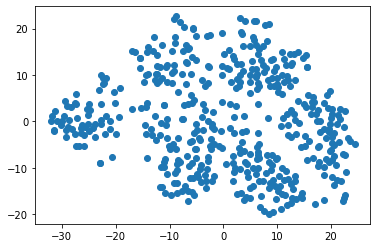

In [52]:
# Visualize the clusters
plt.scatter(X_pca_df['x'], X_pca_df['z'])
plt.show()

In [53]:
y.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [55]:
#plt.scatter(X_pca_df['x'], X_pca_df['z'], c=y)
#plt.show()

There appear to be 5-6 clusters.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9

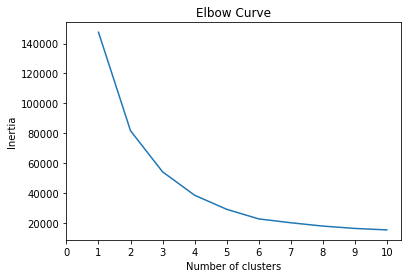

In [57]:
# Part 3: Perform a Cluster Analysis with K-means
# Create an elbow plot to identify the best number of clusters.
# Make sure to do the following:
# Use a for loop to determine the inertia for each k between 1 through 10.
# If possible, determine where the elbow of the plot is, and at which value of k it appears.

from sklearn.cluster import KMeans
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



The line plot gradually has joints leading up to 6 clusters, after which it smooths out, so we say that there appears to be an elbow at 6, so this is the optimal number of clusters it seems. Then, k = 6.

In [58]:
# Part 4: Make a Recommendation
# Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook.
# Can the patients be clustered? If so, into how many clusters?

In the K-means analysis, a plot was made to determine the ideal number of clusters, a positive nonzero number meaning that the patients can be clustered. Since the elbow is at 6, that is the optimal number of clusters.